In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [34]:

file_path = r'enriched_merged_data.csv'
df = pd.read_csv(file_path)


In [35]:

df.drop(['lib_risque_pprn'], axis=1, inplace=True)
df.drop(['Identifiant', 'Insee'], axis=1, inplace=True)
df['risk_start_date_catnat'] = pd.to_datetime(df['risk_start_date_catnat'])
df['days_since_risk_start'] = (pd.to_datetime('today') - df['risk_start_date_catnat']).dt.days
df.drop(['risk_start_date_catnat', 'risk_end_date_catnat', 'dat_approbation'], axis=1, inplace=True)



target = 'target'
labels = ['Claimed','Not Claimed']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,ft_11_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,target,risk_type_catnat,lib_risque_risq,days_since_risk_start
0,2014,1.000000,0,V,N,1,O,1,O,N,...,base,2,1351.0,4,2012.0,0.0,0,NaN,NaN,NaN
1,2014,1.000000,0,V,V,V,V,V,V,V,...,base,2,1972.0,2,1980.0,0.0,1,NaN,NaN,NaN
2,2013,1.000000,1,V,V,V,V,V,V,V,...,base,2,1630.0,4,NaN,0.0,0,NaN,NaN,NaN
3,2013,0.246575,0,N,V,V,V,V,V,V,...,base,2,532.0,3,NaN,0.0,0,NaN,NaN,NaN
4,2015,1.000000,0,V,N,2,O,1,O,N,...,base,2,1050.0,2,1972.0,0.0,0,NaN,NaN,NaN



Inference: The Datset consists of 26 features & 1120493 samples.


In [36]:
categorical_columns = [
    'ft_5_categ', 'ft_6_categ', 'ft_7_categ', 'ft_8_categ', 'ft_9_categ',
    'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ', 'ft_14_categ',
    'ft_15_categ', 'ft_16_categ', 'ft_17_categ', 'ft_18_categ', 'ft_19_categ','risk_type_catnat','lib_risque_risq'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')


In [37]:
#you can run this cell one time only
df['ft_9_categ'] = df['ft_9_categ'].cat.codes

In [38]:
df = df[df['ft_23_categ'] != 'V']
df['ft_23_categ'] = pd.to_numeric(df['ft_23_categ'], errors='coerce')



df['ft_9_categ'] = df['ft_9_categ'].astype('int8')
df['ft_9_categ'] = df['ft_9_categ'] - 1

df['ft_23_categ'] = df['ft_23_categ'].astype('category')
df['ft_9_categ'] = df['ft_9_categ'].astype('category')
df['ft_4_categ'] = df['ft_4_categ'].astype('category')



In [39]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1120378 entries, 0 to 1120492
Data columns (total 26 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   ft_2_categ             1120378 non-null  int64   
 1   EXPO                   1120378 non-null  float64 
 2   ft_4_categ             1120378 non-null  category
 3   ft_5_categ             1120378 non-null  category
 4   ft_6_categ             1120378 non-null  category
 5   ft_7_categ             1120378 non-null  category
 6   ft_8_categ             1120378 non-null  category
 7   ft_9_categ             1120378 non-null  category
 8   ft_10_categ            1120378 non-null  category
 9   ft_11_categ            1120378 non-null  category
 10  ft_12_categ            1120378 non-null  category
 11  ft_13_categ            1120378 non-null  category
 12  ft_14_categ            1120378 non-null  category
 13  ft_15_categ            1120378 non-null  category
 14  ft_16_c

In [61]:
nf = []  # List to hold names of numerical features
cf = []  # List to hold names of categorical features

# Iterate over each column and classify based on data type
for col in df.columns:
    if df[col].dtype == 'category':
        cf.append(col)
    elif df[col].dtype in ['int64', 'float64', 'int8']:
        nf.append(col)

print('\n\033[1mInference:\033[0m The Dataset has {} numerical & {} categorical features.'.format(len(nf), len(cf)))



Inference: The Dataset has 6 numerical & 19 categorical features.


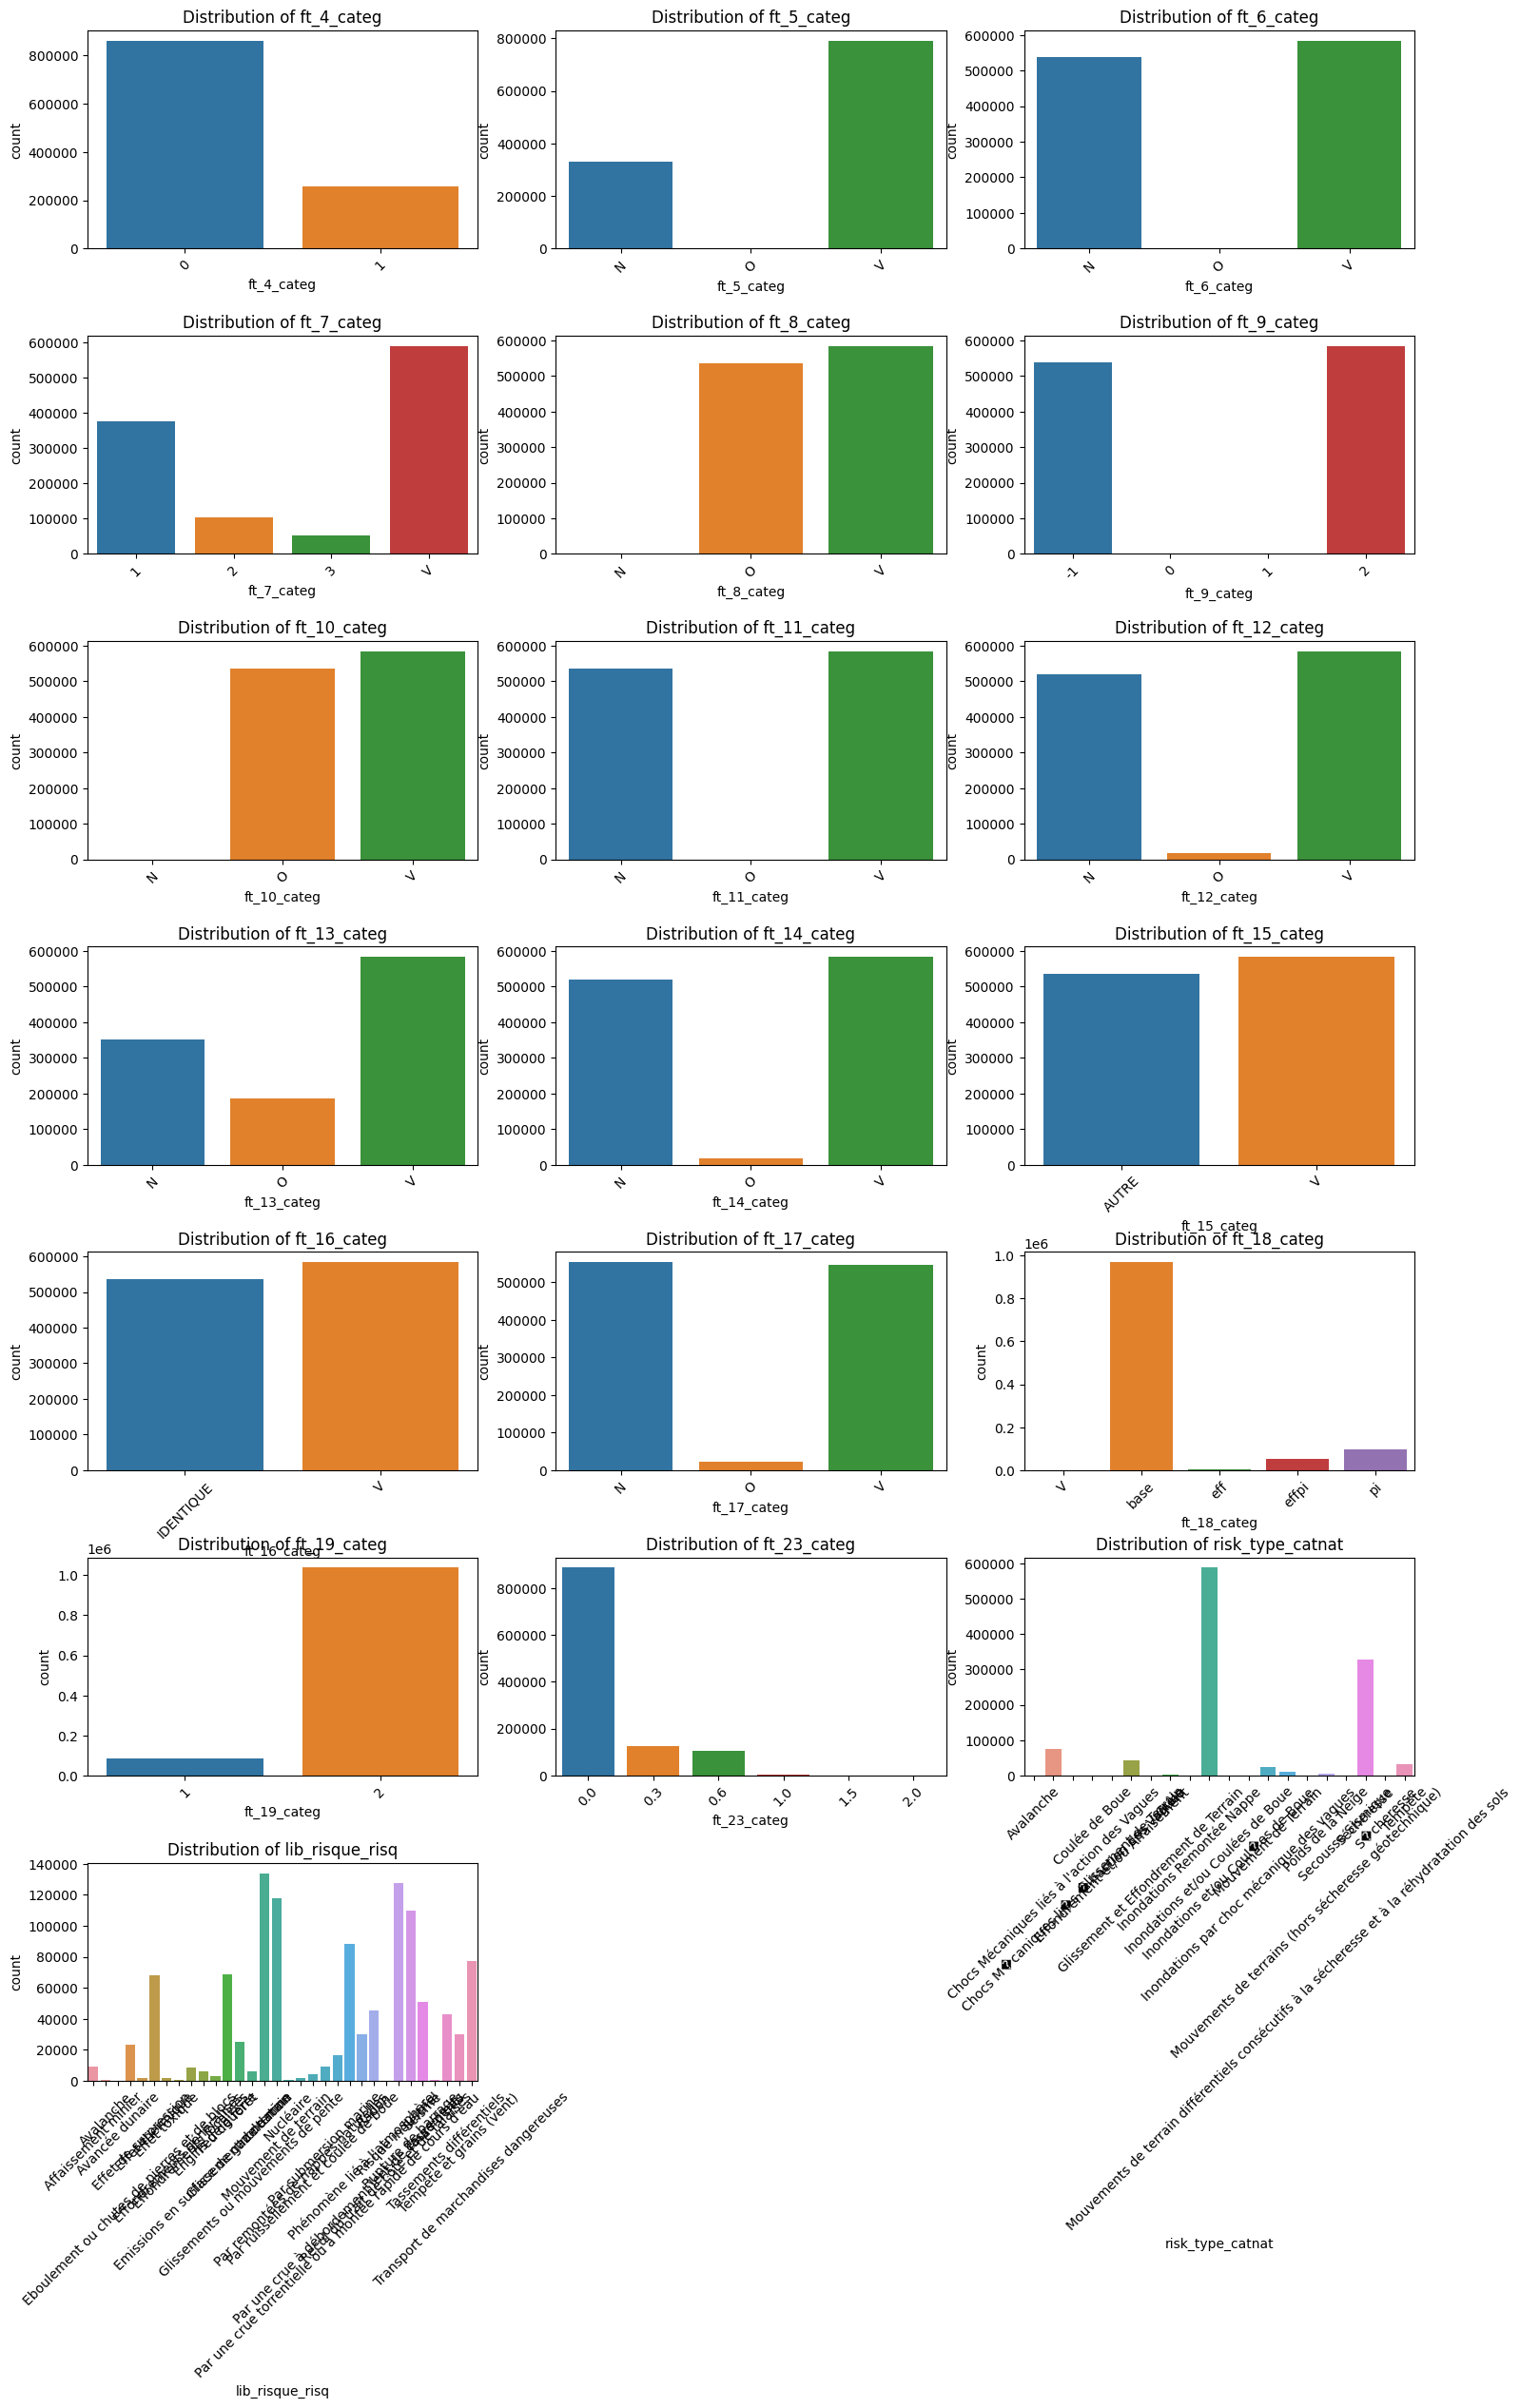

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Assuming 'cf' is your list of categorical feature column names
plots_per_row = 3  # Define how many plots you want per row
total_plots = len(cf)  # Total number of categorical features to plot

# Calculate the number of rows needed based on the total_plots and plots_per_row
num_rows = math.ceil(total_plots / plots_per_row)

# Set the overall figure size (width, height) to give each subplot a good size
# You might need to adjust these values based on your screen size and preferences
fig_width = plots_per_row * 6  # Example: 3 plots per row, each plot 6 inches wide
fig_height = num_rows * 4  # Example: each plot 4 inches in height

plt.figure(figsize=(fig_width, fig_height))

for i, col in enumerate(cf, 1):  # Enumerate starting from 1 for subplot indexing
    plt.subplot(num_rows, plots_per_row, i)  # Create subplot for each categorical feature
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotate the x labels to prevent overlap
plt.subplots_adjust(hspace=0.4)  # Increase hspace value as needed to add more space

plt.tight_layout()  # Automatically adjust subplot params to give specified padding
plt.show()


                                     Features Distribution                                      


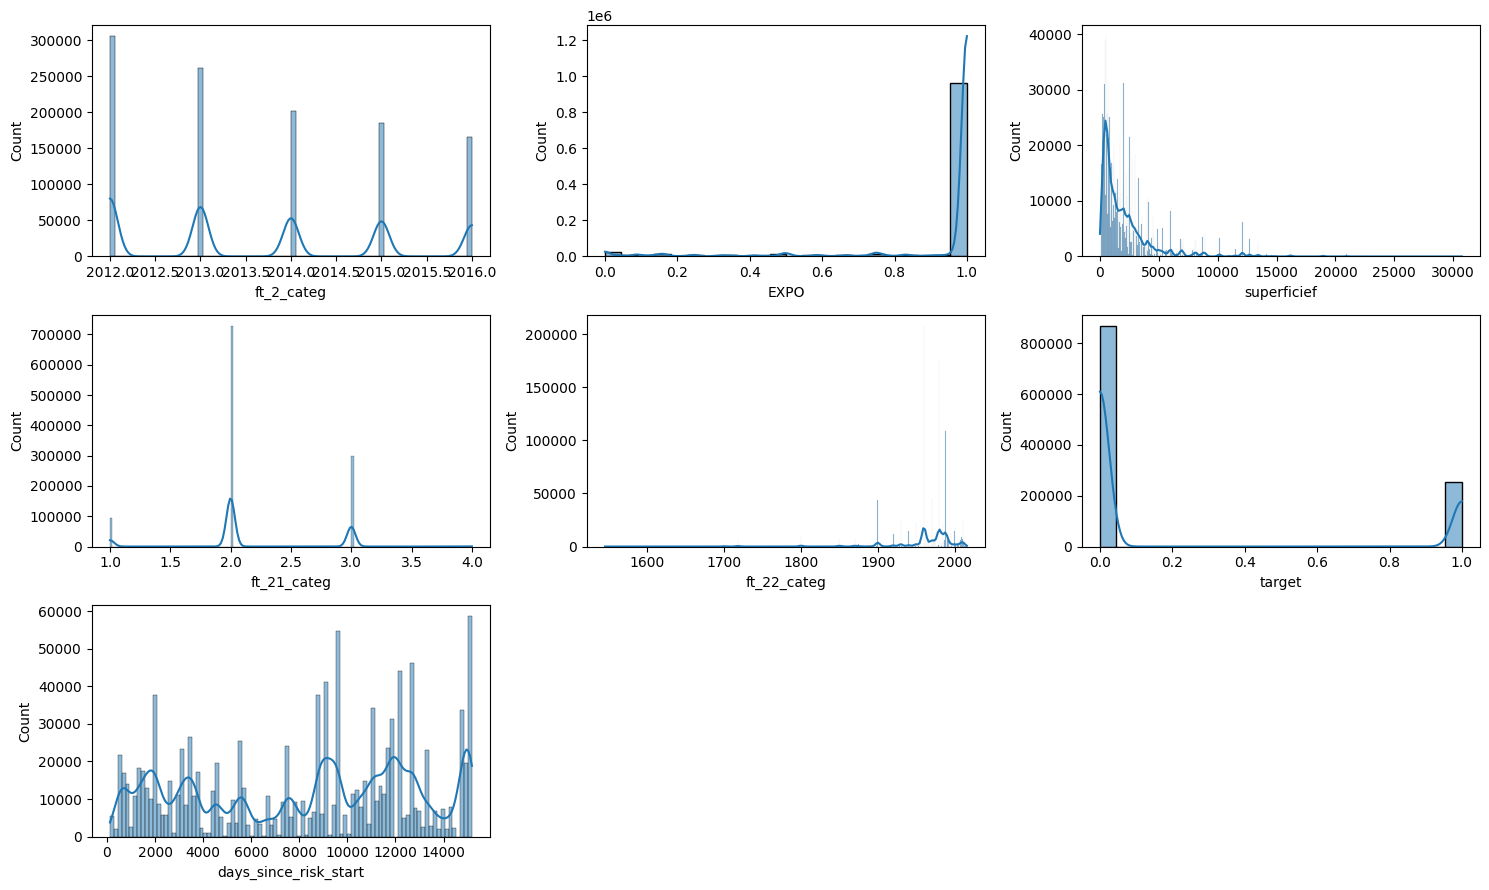

In [42]:


print('\033[1mFeatures Distribution'.center(100))

# Assuming 'nf' is a list of numerical feature column names and 'df' is your DataFrame
plt.figure(figsize=[15, 3 * math.ceil(len(nf)/3)])
for c, feature in enumerate(nf, 1):
    plt.subplot(math.ceil(len(nf)/3), 3, c)
    sns.histplot(df[feature], kde=True)  # Added kde=True for Kernel Density Estimate overlay
plt.tight_layout()
plt.show()


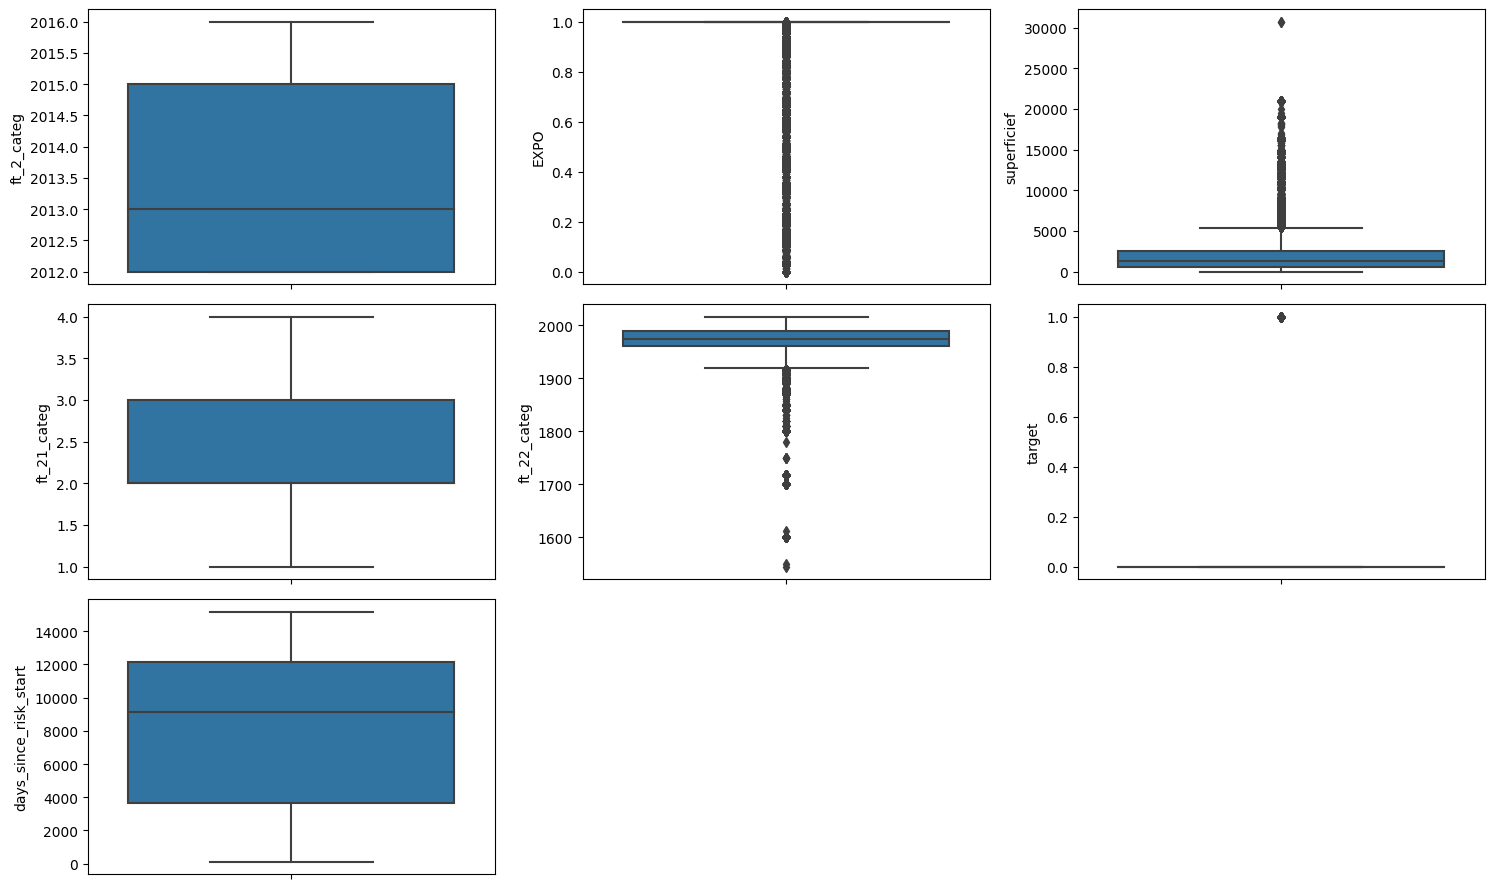

In [43]:
plt.figure(figsize=[15, 3 * math.ceil(len(nf)/3)])
for c, feature in enumerate(nf, 1):
    plt.subplot(math.ceil(len(nf)/3), 3, c)
    sns.boxplot(y=df[feature])  # Note: Using 'y=' to ensure vertical boxplots
plt.tight_layout()
plt.show()


In [44]:
#g=sns.pairplot(df, hue=target, size=4)
#g.map_upper(sns.kdeplot, levels=1, color=".2")
#plt.show()

In [45]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

                       Total Null Values  Percentage
ft_2_categ                             0         0.0
target                                 0         0.0
ft_23_categ                            0         0.0
ft_21_categ                            0         0.0
ft_19_categ                            0         0.0
ft_18_categ                            0         0.0
ft_17_categ                            0         0.0
ft_16_categ                            0         0.0
ft_15_categ                            0         0.0
ft_13_categ                            0         0.0
ft_14_categ                            0         0.0
ft_11_categ                            0         0.0
ft_10_categ                            0         0.0
ft_9_categ                             0         0.0
ft_8_categ                             0         0.0
ft_7_categ                             0         0.0
ft_6_categ                             0         0.0
ft_5_categ                             0      

In [46]:
#df.to_csv(r'last_dataset.csv', index=False)


In [47]:
# Display summary statistics for numerical columns
print(df.describe())


         ft_2_categ          EXPO   superficief   ft_21_categ    ft_22_categ   
count  1.120378e+06  1.120378e+06  1.120374e+06  1.120378e+06  955268.000000  \
mean   2.013682e+03  9.203159e-01  2.012366e+03  2.183945e+00    1963.675186   
std    1.406871e+00  2.272346e-01  2.305080e+03  5.667609e-01      43.208496   
min    2.012000e+03  0.000000e+00  1.000000e+00  1.000000e+00    1545.000000   
25%    2.012000e+03  1.000000e+00  5.500000e+02  2.000000e+00    1960.000000   
50%    2.013000e+03  1.000000e+00  1.253000e+03  2.000000e+00    1974.000000   
75%    2.015000e+03  1.000000e+00  2.500000e+03  3.000000e+00    1988.000000   
max    2.016000e+03  1.000000e+00  3.074500e+04  4.000000e+00    2016.000000   

             target  days_since_risk_start  
count  1.120378e+06           1.112159e+06  
mean   2.259782e-01           8.216814e+03  
std    4.182251e-01           4.599156e+03  
min    0.000000e+00           1.250000e+02  
25%    0.000000e+00           3.679000e+03  
50%    0.

In [48]:
# Check for missing values
print(df.isnull().sum())



ft_2_categ                    0
EXPO                          0
ft_4_categ                    0
ft_5_categ                    0
ft_6_categ                    0
ft_7_categ                    0
ft_8_categ                    0
ft_9_categ                    0
ft_10_categ                   0
ft_11_categ                   0
ft_12_categ                   0
ft_13_categ                   0
ft_14_categ                   0
ft_15_categ                   0
ft_16_categ                   0
ft_17_categ                   0
ft_18_categ                   0
ft_19_categ                   0
superficief                   4
ft_21_categ                   0
ft_22_categ              165110
ft_23_categ                   0
target                        0
risk_type_catnat           8219
lib_risque_risq           11385
days_since_risk_start      8219
dtype: int64


In [49]:
#drop ft_22_categ
df.drop(['ft_22_categ'], axis=1, inplace=True)

In [50]:
# Display the data types of each column
print(df.dtypes)

ft_2_categ                  int64
EXPO                      float64
ft_4_categ               category
ft_5_categ               category
ft_6_categ               category
ft_7_categ               category
ft_8_categ               category
ft_9_categ               category
ft_10_categ              category
ft_11_categ              category
ft_12_categ              category
ft_13_categ              category
ft_14_categ              category
ft_15_categ              category
ft_16_categ              category
ft_17_categ              category
ft_18_categ              category
ft_19_categ              category
superficief               float64
ft_21_categ                 int64
ft_23_categ              category
target                      int64
risk_type_catnat         category
lib_risque_risq          category
days_since_risk_start     float64
dtype: object


In [51]:
#number of ligne and columns
print(df.shape)

(1120378, 25)


In [52]:
# number of unique values in each column
print(df.nunique())

ft_2_categ                  5
EXPO                      461
ft_4_categ                  2
ft_5_categ                  3
ft_6_categ                  3
ft_7_categ                  4
ft_8_categ                  3
ft_9_categ                  4
ft_10_categ                 3
ft_11_categ                 3
ft_12_categ                 3
ft_13_categ                 3
ft_14_categ                 3
ft_15_categ                 2
ft_16_categ                 2
ft_17_categ                 3
ft_18_categ                 5
ft_19_categ                 2
superficief              2463
ft_21_categ                 4
ft_23_categ                 6
target                      2
risk_type_catnat           20
lib_risque_risq            32
days_since_risk_start     772
dtype: int64


In [53]:
#df.to_csv(r'C:\VS Code\BuildingClaimPrediction\last_dataset.csv', index=False)


In [54]:
# Assuming 'df' is your DataFrame
columns_of_interest = ['risk_type_catnat', 'lib_risque_risq']
unique_values_selected_columns = {col: df[col].unique().tolist() for col in columns_of_interest}

# To see the unique values for the specified columns
print(unique_values_selected_columns['risk_type_catnat'])
print(unique_values_selected_columns['lib_risque_risq'])




[nan, 'Inondations et/ou Coulées de Boue', 'Sécheresse', 'Mouvement de Terrain', "Chocs Mécaniques liés à l'action des Vagues", 'Tempête', 'Grêle', 'Mouvements de terrain différentiels consécutifs à la sécheresse et à la réhydratation des sols', 'Poids de la Neige', 'Glissement de Terrain', 'Secousse Sismique', 'Inondations Remontée Nappe', 'Inondations par choc mécanique des vagues', 'Inondations et/ou Coul�es de Boue', 'Mouvements de terrains (hors sécheresse géotechnique)', 'Avalanche', 'Coulée de Boue', 'Effondrement et/ou Affaisement', 'S�cheresse', 'Glissement et Effondrement de Terrain', "Chocs M�caniques li�s � l'action des Vagues"]
[nan, 'Inondation', "Par une crue à débordement lent de cours d'eau", 'Mouvement de terrain', 'Tassements différentiels', 'Séisme', 'Rupture de barrage', "Par une crue torrentielle ou à montée rapide de cours d'eau", 'Par remontées de nappes naturelles', 'Radon', 'Eboulement ou chutes de pierres et de blocs', 'Glissement de terrain', 'Feu de forêt',

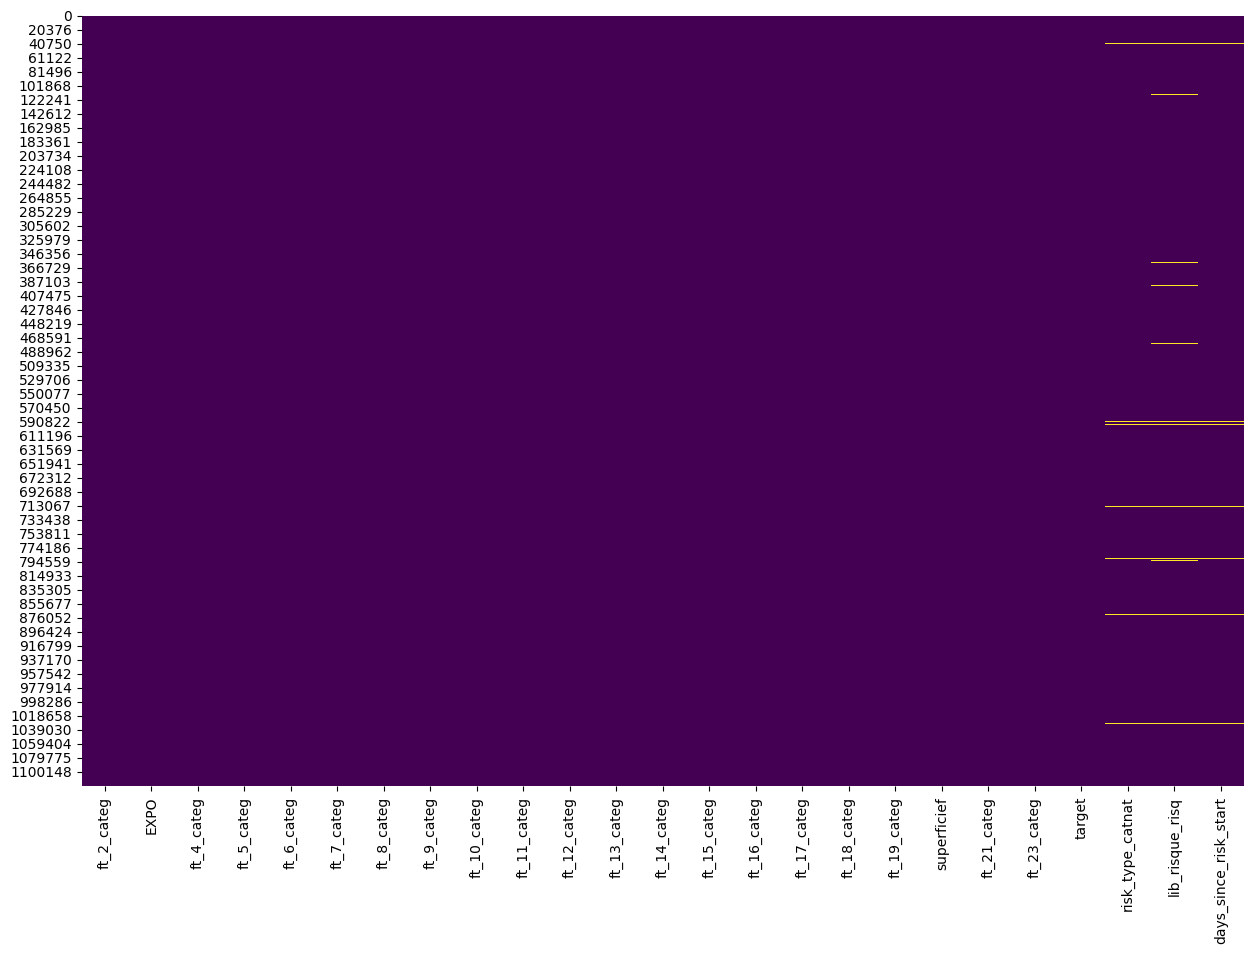

In [55]:

# Assuming 'df' is your DataFrame
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


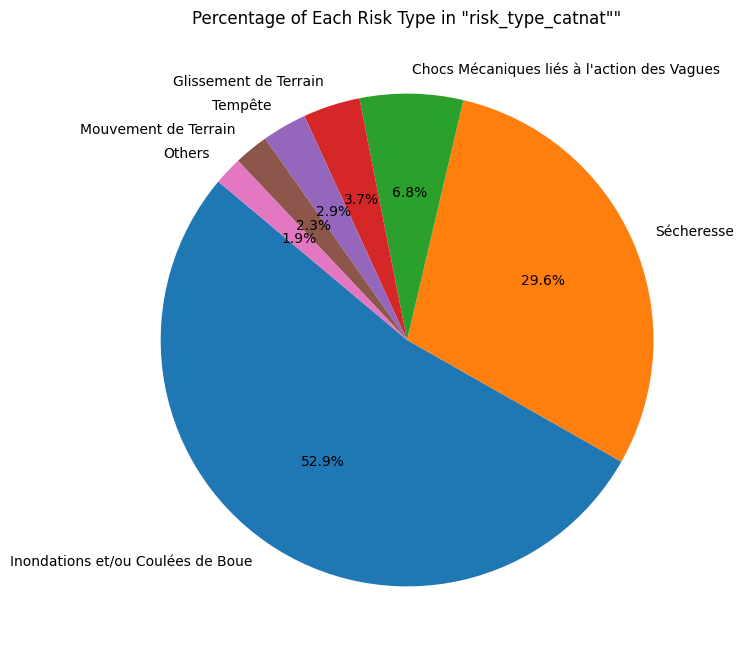

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'risk_type_catnat' is the column of interest

# Calculate the frequency of each value as a percentage
value_counts = df['risk_type_catnat'].value_counts(normalize=True) * 100

# Create a new series where values less than 1% are replaced with 'Others'
value_counts_adjusted = value_counts.where(value_counts >= 1, other='Others')

# Aggregate percentages for 'Others'
others_percentage = value_counts[value_counts < 1].sum()
adjusted_values = value_counts[value_counts >= 1]
if others_percentage > 0:
    adjusted_values['Others'] = others_percentage

# Plotting the pie chart with aggregated 'Others' category
plt.figure(figsize=(10, 8))
plt.pie(adjusted_values, labels=adjusted_values.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Each Risk Type in "risk_type_catnat""')
plt.show()


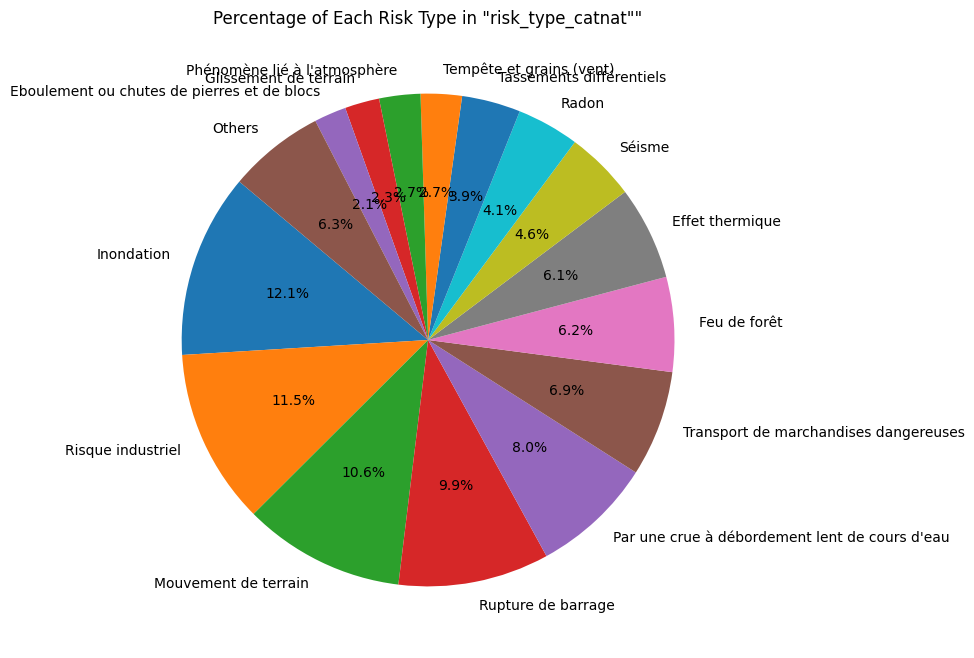

In [57]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'risk_type_catnat' is the column of interest

# Calculate the frequency of each value as a percentage
value_counts = df['lib_risque_risq'].value_counts(normalize=True) * 100

# Create a new series where values less than 1% are replaced with 'Others'
value_counts_adjusted = value_counts.where(value_counts >= 1, other='Others')

# Aggregate percentages for 'Others'
others_percentage = value_counts[value_counts < 2].sum()
adjusted_values = value_counts[value_counts >= 2]
if others_percentage > 0:
    adjusted_values['Others'] = others_percentage

# Plotting the pie chart with aggregated 'Others' category
plt.figure(figsize=(10, 8))
plt.pie(adjusted_values, labels=adjusted_values.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Each Risk Type in "risk_type_catnat""')
plt.show()


In [58]:
rows_removed = 0
initial_row_count = df.shape[0]


In [63]:
# Assuming 'cf' contains names of categorical features
for col in cf:
    # Calculate the frequency of each category
    freq = df[col].value_counts(normalize=True)
    
    # Identify rare categories, here defined as those occurring less than 1% of the time
    rare_categories = freq[freq < 0.01].index
    
    # Option 1: Filter out rows with rare categories
    df = df[~df[col].isin(rare_categories)]
    
    # Option 2: Replace rare categories with a common label, e.g., 'Other'
    # df[col] = df[col].replace(rare_categories, 'Other')


In [64]:
final_row_count = df.shape[0]
rows_removed = initial_row_count - final_row_count  # Calculate the total number of rows removed

print(f"Initial rows: {initial_row_count}")
print(f"Final rows: {final_row_count}")
print(f"Total rows removed: {rows_removed}")


Initial rows: 1120378
Final rows: 582410
Total rows removed: 537968


In [67]:
#Remove NAN
#outliers?
#one hot incoding for categorical data (it's necessary for feature correlation)

ValueError: Input contains NaN

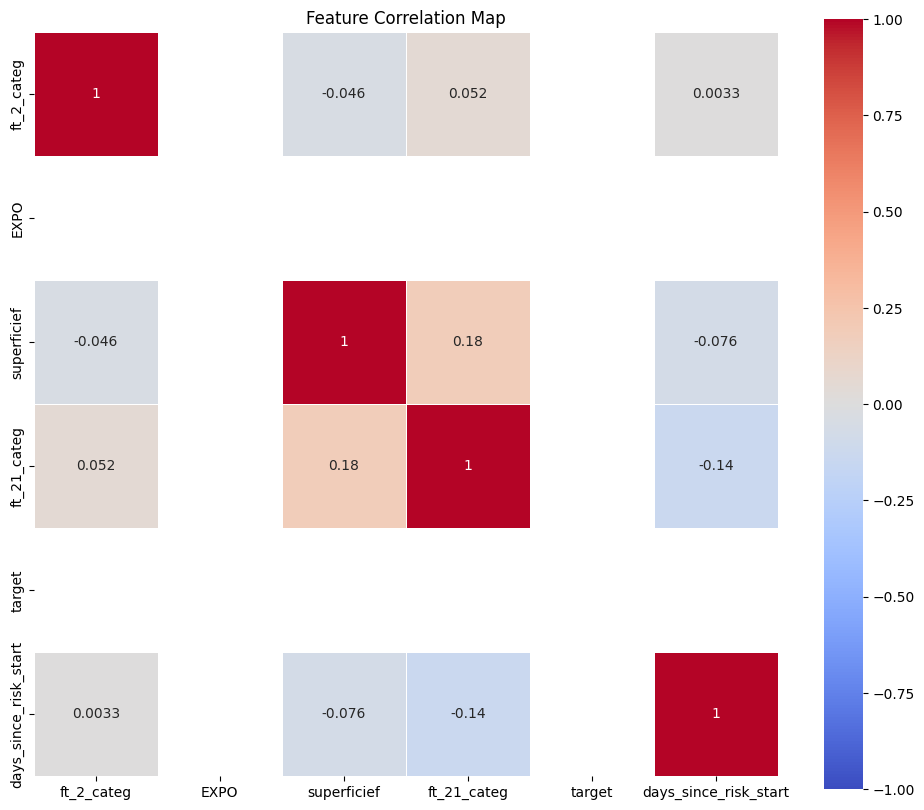

In [71]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64', 'float32', 'int32'])

# Calculate the correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5)
plt.title('Feature Correlation Map')
plt.show()


